# Temperature-dependence of derivative encoding by 5-HT neuron populations

Shown in fig. 7S1.

In [1]:
from common import colors, savefig

In [2]:
from __future__ import division

import os; os.chdir(os.path.join('..', '..'))
print os.getcwd()

/home/eharkin/projects/raphegif/raphegif


In [3]:
import warnings
import re
import copy
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
import numpy as np
from tqdm.notebook import trange

from ezephys import pltools

from grr.Simulation import GIFnet_Simulation
from grr.Spiketrain import PSTH

In [4]:
plt.style.use(os.path.join('figs', 'scripts', 'publication_figure_style.dms'))
IMG_PATH = os.getenv('IMG_PATH')
BASELINE_LEVELS = np.array([-0.080, -0.060, -0.040, -0.020, 0, 0.020, 0.040, 0.060, 0.080])

In [5]:
DATA_PATH = os.path.join(os.getenv('DATA_PATH'), 'simulations', 'GIF_network')

sim_dict = {'Baseline level': [], 'Rep': [], 'Model': []}

for condition in os.listdir(DATA_PATH):
    if condition != 'deriv_input':
        continue
        
    for baseline_level in ['-0.040', '0.000', '0.020', '0.040']:
        for fname in os.listdir(os.path.join(DATA_PATH, condition, '{}_baseline'.format(baseline_level))):
            if fname.endswith(('hdf5', 'h5')):

                try:
                    this_model = GIFnet_Simulation(
                        os.path.join(DATA_PATH, condition, '{}_baseline'.format(baseline_level), fname), 
                        mode = 'r'
                    ) 

                    sim_dict['Model'].append(this_model)
                    sim_dict['Baseline level'].append(float(baseline_level))
                    sim_dict['Rep'].append(
                        int(re.search(r'rep([0-9]+)', fname).groups()[-1])
                    )
                    
                except IOError:
                    print('Problem with {} baseline {}'.format(baseline_level, fname))
                    continue
            

sim_df = pd.DataFrame(sim_dict).sort_values(['Rep'])
sim_df.reset_index(inplace=True, drop=True)
sim_df.head()

,Baseline level,Model,Rep
0,0.00,"[connectivity_matrix, gaba, ser]",0
1,0.02,"[connectivity_matrix, gaba, ser]",0
2,-0.04,"[connectivity_matrix, gaba, ser]",0
3,0.04,"[connectivity_matrix, gaba, ser]",0
4,-0.04,"[connectivity_matrix, gaba, ser]",1


In [6]:
for k, v in sim_dict.iteritems():
    print('{} {}'.format(k, len(v)))

Baseline level 80
Rep 80
Model 80


In [7]:
sim_df['Principal PSTH'] = None
sim_df['Principal PSTH'] = sim_df['Principal PSTH'].astype(object)

In [8]:
PSTH_width = 50.

for i in trange(sim_df.shape[0], desc='Model'):
    
    # Get PSTH from 5HT population.
    sim_df.at[i, 'Principal PSTH'] = np.empty((
        sim_df.loc[i, 'Model'].get_no_sweeps(), 
        sim_df.loc[i, 'Model'].get_no_timesteps()
    ))
    for sweep_no in trange(sim_df.loc[i, 'Model'].get_no_sweeps(), desc='5HT sweep', leave=False):
        sim_df.loc[i, 'Principal PSTH'][sweep_no, :] = PSTH(
            sim_df.loc[i, 'Model'].ser_spktrains[sweep_no, ...].sum(axis = 0),
            PSTH_width,
            sim_df.loc[i, 'Model'].get_no_ser_neurons()
        )

print('\nDone!')

Model:   0%|          | 0/80 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]

5HT sweep:   0%|          | 0/20 [00:00<?, ?it/s]


Done!


In [9]:
sim_df.head()

,Baseline level,Model,Rep,Principal PSTH
0,0.00,"[connectivity_matrix, gaba, ser]",0,"[[0.3333333432674408, 0.3333333432674408, 0.33..."
1,0.02,"[connectivity_matrix, gaba, ser]",0,"[[0.5666667222976685, 0.5666667222976685, 0.56..."
2,-0.04,"[connectivity_matrix, gaba, ser]",0,"[[0.1666666716337204, 0.1666666716337204, 0.16..."
3,0.04,"[connectivity_matrix, gaba, ser]",0,"[[1.7000001668930054, 1.7000001668930054, 1.73..."
4,-0.04,"[connectivity_matrix, gaba, ser]",1,"[[0.10000000894069672, 0.10000000894069672, 0...."


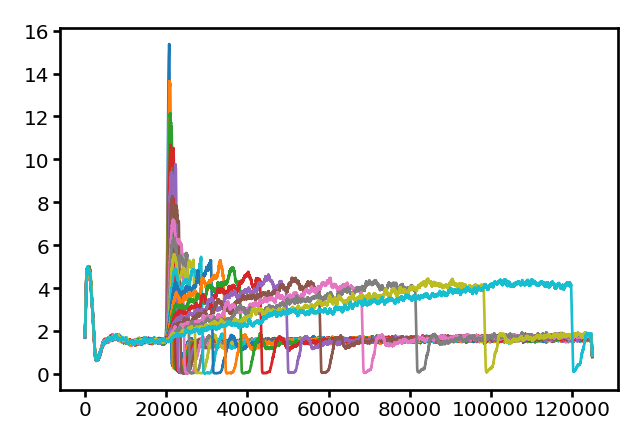

In [10]:
psths = []
for i, row in sim_df.loc[sim_df['Baseline level'] == 0.040, ['Rep', 'Principal PSTH']].iterrows():
    psths.append(row['Principal PSTH'].T)
    
psths = np.array(psths)

plt.plot(psths.mean(axis=0))

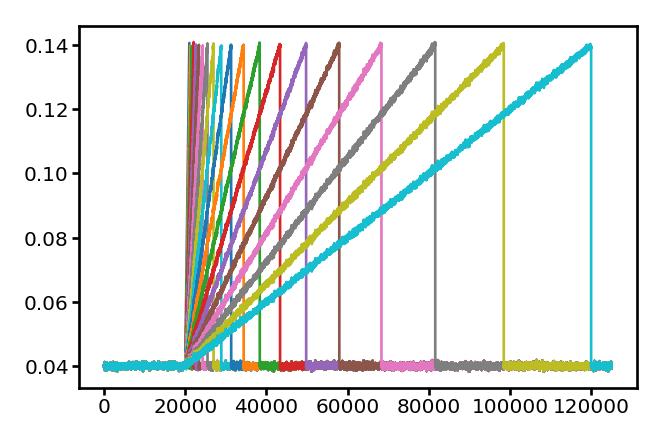

In [11]:
sim_df['baseline'] = sim_df['Baseline level']
inputs = np.array(sim_df.query('baseline == 0.040 and Rep == 0')['Model'].item()['ser/examples/I']).mean(axis=1).T
plt.plot(inputs)

In [12]:
def arg_fall(x):
    return np.argmin(np.diff(x))

def clean_input(input_, baseline, ramp_start_ind):
    ramp_stop_ind = arg_fall(input_)
    clean_ramp = np.concatenate([
        np.ones(ramp_start_ind) * baseline, 
        np.linspace(baseline, baseline + 0.1, ramp_stop_ind - ramp_start_ind), 
        np.ones(len(input_) - ramp_stop_ind) * baseline
    ])
    clean_diff = np.gradient(clean_ramp) / 1e-4
    return {'ramp': clean_ramp, 'deriv': clean_diff}

def best_fit(x, y, fit_until):
    """Scale and offset x to best fit y."""
    x_centred = x - x[:100].mean()
    p = np.linalg.lstsq(x_centred[:fit_until, None], y[:fit_until, None] - y[:100].mean())[0][0]
    return x_centred * p + y[:100].mean()

def simple_fit(input_, baseline, ramp_start, response):
    c = clean_input(input_, baseline, ramp_start)
    fall = arg_fall(input_) - 1
    return {k: best_fit(c[k], response, fall) for k in c}

In [13]:
_psths_mean = psths.mean(axis=0)
dt = 0.1
_num_sweeps = 20
_ramp_durations = np.logspace(np.log10(100), np.log10(1e4), _num_sweeps)
assert _num_sweeps == _psths_mean.shape[1]
_baseline = 40
_ramp_amplitude = 100
_deriv_in_pA_s = _ramp_amplitude / (_ramp_durations * 1e-3)
_ramp_start_ind = 20000
_pad = 250  # Trim this many time steps from start and end of each ramp due to convolution issues
_y = [
    _psths_mean[_ramp_start_ind + _pad:_ramp_start_ind + int(_ramp_durations[i]/dt) - _pad, i]
    for i in range(_num_sweeps)
]

_x = {'proportional': [], 'deriv': [], 'const': [], 'weight': []}
for i, __y in enumerate(_y):
    __prop = np.linspace(
        _baseline, 
        _ramp_amplitude + _baseline, 
        int(_ramp_durations[i]/dt)
    )[_pad:-_pad]
    assert len(__prop) == len(__y)
    
    _x['proportional'].append(__prop)
    _x['deriv'].append(np.array([_deriv_in_pA_s[i]] * len(__y)))
    _x['const'].append(np.array([1.] * len(__y)))
    _x['weight'].append(np.array([1. / float(len(__y))] * len(__y)))

del i, __y, __prop

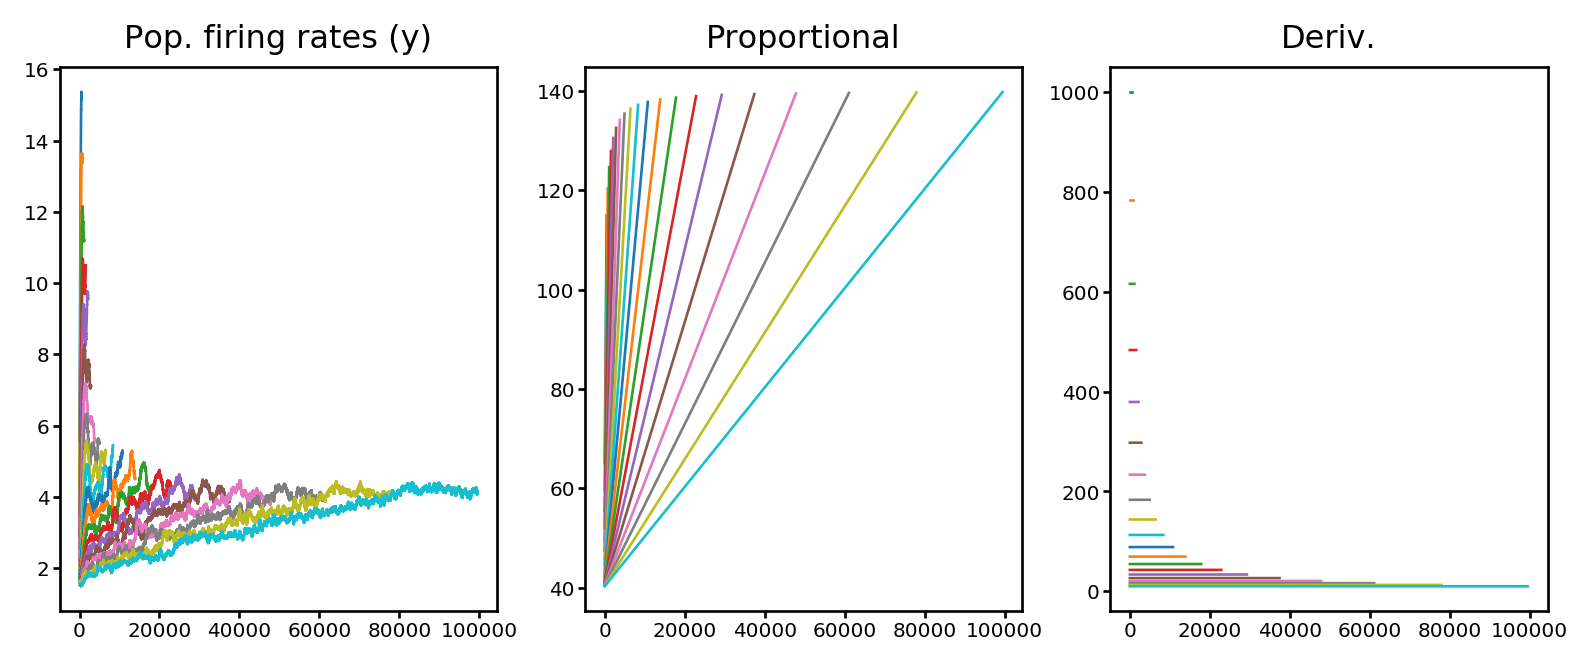

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(8, 3))

axes[0].set_title('Pop. firing rates (y)')
for d in _y:
    axes[0].plot(d)

axes[1].set_title('Proportional')
for d in _x['proportional']:
    axes[1].plot(d)

axes[2].set_title('Deriv.')
for d in _x['deriv']:
    axes[2].plot(d)
    
plt.show()
fig.clf()
plt.close(fig)

In [15]:
def weighted_least_squares(X, y, weights):
    XTWX = np.dot((X.T * weights), X)
    XTWy = np.dot(X.T, weights * y)
    coeffs = np.linalg.solve(XTWX, XTWy)
    return coeffs

In [16]:
_y_vec = np.concatenate(_y)
_x_matrix = np.array([
    np.concatenate(__x) for __x in [_x['proportional'], _x['deriv'], _x['const']]
]).T
_x_weights = np.concatenate(_x['weight'])
_coeffs = weighted_least_squares(_x_matrix, _y_vec, _x_weights)
_coeffs

array([0.03586969, 0.00950571, 0.07329499])

In [17]:
_pred_y = [
    np.dot(np.array([_x['proportional'][i], _x['deriv'][i], _x['const'][i]]).T, _coeffs)
    for i in range(len(_y))
]
_pred_y_no_deriv = [
    np.dot(np.array([_x['proportional'][i], _x['const'][i]]).T, _coeffs[[0, 2]])
    for i in range(len(_y))
]

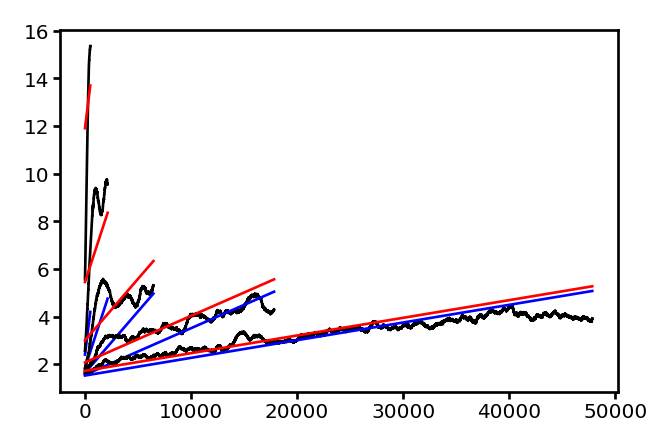

In [18]:
for i in range(0, len(_y), 4):
    plt.plot(_y[i], 'k-')
    plt.plot(_pred_y[i], 'r-')
    plt.plot(_pred_y_no_deriv[i], 'b-')
plt.show()

In [19]:
def build_x_matrix(
    ramp_start_ind, 
    ramp_duration_timesteps, 
    ramp_amplitude, 
    ramp_baseline, 
    trailing_timesteps, 
    deriv_in_pA_s
):
    bsl_ = np.ones(ramp_start_ind)
    trl_ = np.ones(trailing_timesteps)
    proportional = np.concatenate([
        bsl_ * ramp_baseline, 
        np.linspace(ramp_baseline, ramp_baseline + ramp_amplitude, ramp_duration_timesteps),
        trl_ * ramp_baseline
    ])
    deriv = np.concatenate([
        bsl_ * 0.,
        [deriv_in_pA_s] * (ramp_duration_timesteps - 1),
        [-ramp_amplitude / 1e-4],
        trl_ * 0.
    ])
    constant = np.concatenate([
        bsl_,
        np.ones(ramp_duration_timesteps),
        trl_
    ])
    return np.array([proportional, deriv, constant]).T

In [20]:
_restricted_coeffs = np.copy(_coeffs)
_restricted_coeffs[1] = 0.

Saving svg
Saving png
Done!


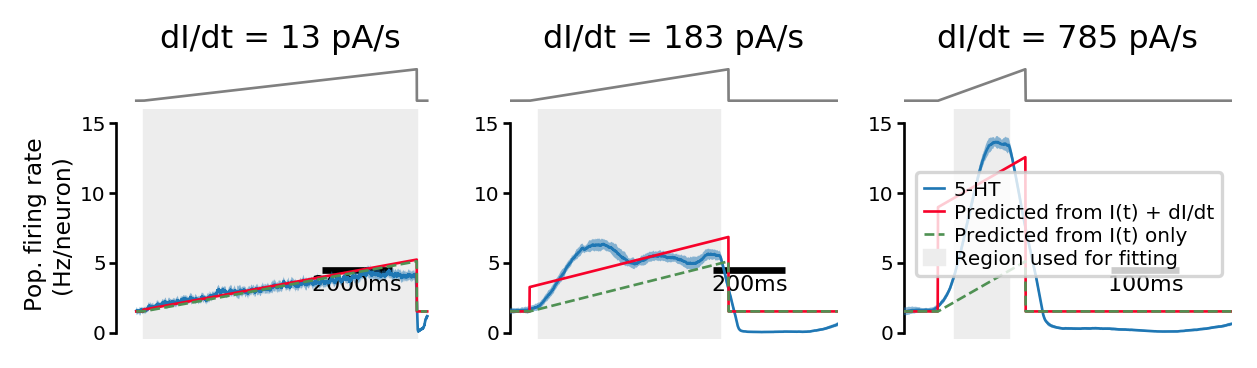

In [27]:
inds = [18, 7, 1]
fig, axes = plt.subplots(2, len(inds), figsize=(6, 1.5), gridspec_kw={'height_ratios': [0.15, 1], 'hspace': 0.05})
_time = np.arange(0, _psths_mean.shape[0]) * dt
_lower_data_lim = 18000
_lower_x_lim = 1900
_trailing_timesteps = int(500. / dt)

axes[1, 0].set_ylabel('Pop. firing rate\n(Hz/neuron)')

for i, ax, ax_in in zip(inds, axes[1], axes[0]):
    _data_slice = slice(_lower_data_lim, _lower_data_lim + int(_ramp_durations[i] / dt) + 5000, 5)
    ax_in.set_title('dI/dt = {:.0f} pA/s'.format(_deriv_in_pA_s[i]))
    ax.axvspan(
        (_ramp_start_ind + _pad) * dt, 
        (_ramp_start_ind * dt - _pad * dt + _ramp_durations[i]),
        color=(0.93, 0.93, 0.93),
        label='Region used for fitting',
        zorder=1
    )
    ax.fill_between(
        _time[_data_slice], 
        _psths_mean[_data_slice, i] - psths[:, _data_slice, i].std(axis=0), 
        _psths_mean[_data_slice, i] + psths[:, _data_slice, i].std(axis=0),
        edgecolor='none',
        facecolor=colors['ser'],
        alpha=0.5,
        zorder=3
    )
    ax.plot(_time[_data_slice], _psths_mean[_data_slice, i], label='5-HT', color=colors['ser'], zorder=4)
    
    _x_matrix = build_x_matrix(
        _ramp_start_ind, 
        int(_ramp_durations[i] / dt), 
        _ramp_amplitude, 
        _baseline, 
        _trailing_timesteps,
        _deriv_in_pA_s[i]
    )
    ax_in.plot(_time[_data_slice], _x_matrix[_data_slice, 0], color=colors['input'])
    pltools.hide_border('a', ax=ax_in)
    
    _pred_full = np.dot(_x_matrix, _coeffs)
    _pred_restricted = np.dot(_x_matrix, _restricted_coeffs)
    
    ax.plot(
        _time[_data_slice], _pred_full[_data_slice], color='xkcd:cherry red',
        label='Predicted from I(t) + dI/dt',
        zorder=5
    )
    ax.plot(
        _time[_data_slice], _pred_restricted[_data_slice], 
        color='xkcd:light forest green', ls='--',
        label='Predicted from I(t) only',
        zorder=5
    )
    _lower_x_pad = max(_ramp_durations[i] * 0.1, 50.)
    _upper_x_pad = max(_ramp_durations[i] * 0.1, 300.)
    ax.set_xlim(
        _ramp_start_ind * dt - _lower_x_pad, 
        _ramp_start_ind * dt + _ramp_durations[i] + _upper_x_pad
    )
    ax_in.set_xlim(
        _ramp_start_ind * dt - _lower_x_pad, 
        _ramp_start_ind * dt + _ramp_durations[i] + _upper_x_pad
    )
    ax.set_ylim(-0.5, 16)
    pltools.add_scalebar('ms', omit_y=True, anchor=(0.9, 0.3), ax=ax, remove_frame=False, linewidth=2.)
    pltools.hide_border('trb', trim=True, ax=ax)

ax.legend()

savefig(os.path.join(os.getenv('IMG_PATH'), 'deriv_coding_fit'))

Saving svg
Saving png
Done!


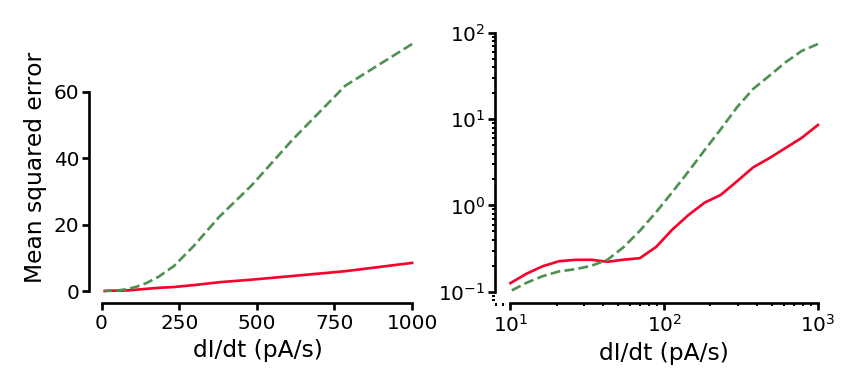

In [28]:
plt.figure(figsize=(4, 1.5))

_mse_full = np.array([np.mean((_y[i] - _pred_y[i])**2) for i in range(len(_y))])
_mse_restricted = np.array([np.mean((_y[i] - _pred_y_no_deriv[i])**2) for i in range(len(_y))])

plt.subplot(121)
plt.plot(_deriv_in_pA_s, _mse_full, color='xkcd:cherry red')
plt.plot(_deriv_in_pA_s, _mse_restricted, color='xkcd:light forest green', ls='--')
plt.ylabel('Mean squared error')
plt.xlabel('dI/dt (pA/s)')
pltools.hide_border('tr', trim=True)

plt.subplot(122)
plt.loglog(_deriv_in_pA_s, _mse_full, color='xkcd:cherry red')
plt.loglog(_deriv_in_pA_s, _mse_restricted, color='xkcd:light forest green', ls='--')
plt.xlabel('dI/dt (pA/s)')
pltools.hide_border('tr', trim=True)

savefig(os.path.join(os.getenv('IMG_PATH'), 'deriv_coding_fit_benchmarks'))

plt.show()